In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

from matplotlib import rc
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

loaded = np.load("../results/noisy_LR.npz")

x = loaded["x"]
loss_full_label_list = loaded["loss_full_label_list"]
loss_random_list = loaded["loss_random_list"]
loss_fs_inference_list = loaded["loss_fs_inference_list"]
loss_fs_estimate_list = loaded["loss_fs_estimate_list"]
print(loss_full_label_list.mean(axis=1))
print(loss_full_label_list.std(axis=1))

[0.8569068  0.81703323 0.9204607  0.8507857  0.91654027 0.7506978
 0.91894394 0.84354997 1.0173054  0.79494226]
[0.7095844  0.7384399  1.1243811  0.6650294  0.835802   0.5863115
 0.78704107 0.98115057 1.3296944  0.63027143]


In [2]:
full_inference = np.mean(loss_fs_inference_list, axis=0)
full_inference_std = np.std(loss_fs_inference_list, axis=0)
estimate = np.mean(loss_fs_estimate_list, axis=0)
estimate_std = np.std(loss_fs_estimate_list, axis=0)

In [3]:
full = np.mean(loss_full_label_list, axis=0)
full_std = np.std(loss_full_label_list, axis=0)
full[20], full_std[20] 

(4.2855787, 1.8002294)

In [7]:
estimate_std

array([1.4604372, 3.40619  , 2.2640626, 2.2637978, 2.2845964, 2.482389 ,
       2.347944 ], dtype=float32)

[20.303408  14.364339  13.998802  13.376208   5.8530045  5.214255
  8.373839   5.5611305]


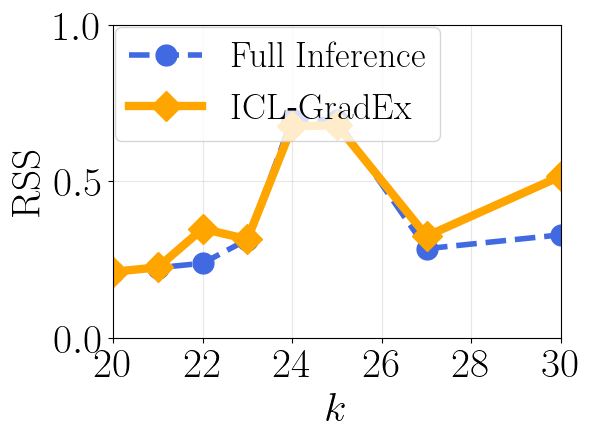

In [25]:
import matplotlib.ticker as ticker

n_total = 41
x_full = np.arange(n_total)
# plt.plot(x_full, np.mean(loss_full_label_list, axis=0), lw=4, label=r'$\mathrm{Oracle}$')
# plt.fill_between(x_full, np.mean(loss_full_label_list, axis=0)-np.std(loss_full_label_list, axis=0), np.mean(loss_full_label_list, axis=0)+np.std(loss_full_label_list, axis=0), alpha=0.2)

set_size_list = [1,2,3,4,5,7,10]
n_labeled = 20
x = np.array([20, 21, 22, 23, 24, 25, 27, 30])

oracle = np.array([1.132388,1.4278275,1.2962233,2.3177068,2.1095798,1.7735,3.737203,1.542542,3.1592095,1.6553851,2.008364,3.1242106,3.4691048,3.6111681,1.6247603,5.3027434,2.3662188,6.4890084,7.535301,10.490752,20.303408,14.364339,13.998802,13.376208,5.8530045,5.214255,4.650166,8.373839,5.3543267,5.02941,5.5611305,4.0421314,8.325,3.1822479,3.608688,4.312571,1.8238007,3.2052174,3.08725,3.867112,3.4951947])
print(oracle[x])
full_inference = np.array([4.2855787, 3.220258 , 3.3364882, 4.2028275, 4.090785 , 3.6267319, 2.3859515,
       1.8308179])
full_inference_std = np.array([1.8002294, 1.6725456, 2.912707 , 4.607658 , 4.152474 , 2.9075568, 2.479813 ,
       1.7083361])
estimate = np.array([4.2855787, 3.235249 , 4.8784275, 4.215491 , 3.9573257, 3.5392685, 2.7200763,
       2.873775 ])
estimate_std = np.array([1.8002294, 1.4604372, 3.40619  , 2.2640626, 2.2637978, 2.2845964, 2.482389 ,
       2.347944 ])

full_inference /= oracle[x]
full_inference_std /= oracle[x]
estimate /= oracle[x]
estimate_std /= oracle[x]

fig, ax = plt.subplots(figsize=(6, 4.5))

#plt.plot(x, np.mean(loss_random_list, axis=0), lw=2, label="random")
#plt.fill_between(x, np.mean(loss_random_list, axis=0)-np.std(loss_random_list, axis=0), np.mean(loss_random_list, axis=0)+np.std(loss_random_list, axis=0), alpha=0.2)

plt.plot(x, full_inference, lw=4, label=r"$\mathrm{Full~Inference}$", color="royalblue",  linestyle="--", markersize=15, marker="o")
# plt.fill_between(x, full_inference-full_inference_std, full_inference+full_inference_std, alpha=0.2, color="royalblue")
plt.plot(x, estimate, lw=6, label=r"$\mathrm{ICL}$" + "-" + r"$\mathrm{GradEx}$", color="orange", markersize=15, marker="D")
# plt.fill_between(x, estimate-estimate_std, estimate+estimate_std, alpha=0.2, color="orange")

# for i in range(len(x)):
#     ax.errorbar(x[i], full_inference[i], 
#                 yerr=full_inference_std[i],
#                 capsize=5, capthick=1.5, ecolor='black')
#     ax.errorbar(x[i], estimate[i], 
#                 yerr=estimate_std[i],
#                 capsize=5, capthick=1.5, ecolor='black')


plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(20, 30)
plt.yticks([0, 0.5, 1], fontsize=30)
plt.ylim(0, 1)

plt.legend(fontsize=26, loc='upper right', bbox_to_anchor=(0.77, 1.05))

# plt.title(r'$\mathrm{Linear~regression}$', fontsize=30)
plt.xlabel(r'$k$', fontsize=30)
plt.ylabel(r'$\mathrm{RSS}$', fontsize=30)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("./plot_noisy_lr.pdf", format="pdf", dpi=1200)
plt.show()